In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prédiction de récolte.csv')
data.head()

,ID,State,District,Year,Season,Crop,Area,Production,Rainfall,Temperature,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,User3240,Bihar,ARARIA,1997,Autumn,Rice,17876.0,21397.0,1303.7,31.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,User4124,Bihar,BANKA,1997,Autumn,Rice,38.0,59.0,1303.7,31.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,User5001,Bihar,BEGUSARAI,1997,Autumn,Rice,7812.0,11698.0,1303.7,31.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,User5447,Bihar,BHAGALPUR,1997,Autumn,Rice,1215.0,1867.0,1303.7,31.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,User5967,Bihar,BHOJPUR,1997,Autumn,Rice,682.0,733.0,1303.7,31.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.drop(['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','ID'], axis=1)

# Exploratery Data Analysis 

In [5]:
data.shape

(74975, 9)

In [6]:
data.dtypes

State           object
District        object
Year             int64
Season          object
Crop            object
Area           float64
Production     float64
Rainfall       float64
Temperature    float64
dtype: object

In [7]:
data.describe()

,Year,Area,Production,Rainfall,Temperature
count,74975.000000,74975.000000,7.497500e+04,74975.000000,74975.000000
mean,2005.588169,8360.384978,1.494769e+06,1302.775097,31.456754
std,4.964027,30176.807737,2.895768e+07,555.243785,1.244797
min,1997.000000,0.200000,1.000000e-02,274.700000,29.050000
25%,2002.000000,68.000000,6.440000e+01,1032.400000,29.990000
50%,2005.000000,472.000000,5.260000e+02,1247.000000,32.050000
75%,2010.000000,2882.000000,4.152000e+03,1437.300000,32.450000
max,2015.000000,687000.000000,1.250800e+09,3616.700000,33.470000


In [8]:
data.isna().sum()

State          0
District       0
Year           0
Season         0
Crop           0
Area           0
Production     0
Rainfall       0
Temperature    0
dtype: int64

## Variables qualitatives

In [9]:
for col in data.select_dtypes('object'):
  print(f'{col :-<15} {data[col].nunique()}')

State---------- 12
District------- 253
Season--------- 6
Crop----------- 86


* Un grand nombre de valeurs uniques dans "District" et "Crop" ==> la factorisation de ces variables engendera un grand nombre de colonnes




In [10]:
for col in data.select_dtypes('object'):
  print(f'{col :-<10} {data[col].unique()}')

State----- ['Bihar' 'Odisha' 'Arunachal Pradesh' 'Jammu and Kashmir' 'Punjab'
 'Tamil Nadu' 'Kerala' 'Himachal Pradesh' 'Andaman and Nicobar Islands'
 'Chhattisgarh' 'Uttarakhand' 'Jharkhand']
District-- ['ARARIA' 'BANKA' 'BEGUSARAI' 'BHAGALPUR' 'BHOJPUR' 'DARBHANGA' 'GAYA'
 'GOPALGANJ' 'JEHANABAD' 'KAIMUR (BHABUA)' 'KATIHAR' 'KHAGARIA'
 'KISHANGANJ' 'MADHEPURA' 'MADHUBANI' 'MUNGER' 'MUZAFFARPUR' 'NAWADA'
 'PASHCHIM CHAMPARAN' 'PATNA' 'PURBI CHAMPARAN' 'PURNIA' 'ROHTAS'
 'SAHARSA' 'SAMASTIPUR' 'SARAN' 'SHEOHAR' 'SITAMARHI' 'SIWAN' 'SUPAUL'
 'VAISHALI' 'ANUGUL' 'BALANGIR' 'BALESHWAR' 'BARGARH' 'BHADRAK' 'BOUDH'
 'CUTTACK' 'DEOGARH' 'DHENKANAL' 'GAJAPATI' 'GANJAM' 'JAGATSINGHAPUR'
 'JAJAPUR' 'JHARSUGUDA' 'KALAHANDI' 'KANDHAMAL' 'KENDRAPARA' 'KENDUJHAR'
 'KHORDHA' 'KORAPUT' 'MALKANGIRI' 'MAYURBHANJ' 'NABARANGPUR' 'NAYAGARH'
 'NUAPADA' 'PURI' 'RAYAGADA' 'SAMBALPUR' 'SONEPUR' 'SUNDARGARH'
 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG' 'EAST SIANG' 'LOHIT'
 'LOWER SUBANSIRI' 'PAPUM PARE' 'TAWANG



*   Existence d'une irrégularité de saisie au viveau de la variable Season (Season-------------------------------------------- ['Autumn     ' 'Kharif     ' 'Rabi       ' 'Summer     ' 'Whole Year ' 'Winter     '])

In [11]:
# cortrection de l'irregulatité de saisie 
Season_map = {'Autumn     ': 'Autumn', 'Kharif     ': 'Autumn', 'Summer     ': 'Summer', 'Rabi       ': 'Spring', 'Whole Year ': 'Whole Year', 'Winter     ': 'Winter'}
def mapper(Season):
  return Season_map[Season]
data = pd.DataFrame(data)
data['Season'] = data['Season'].apply(mapper)
data['Season'].unique()

array(['Autumn', 'Spring', 'Summer', 'Whole Year', 'Winter'], dtype=object)

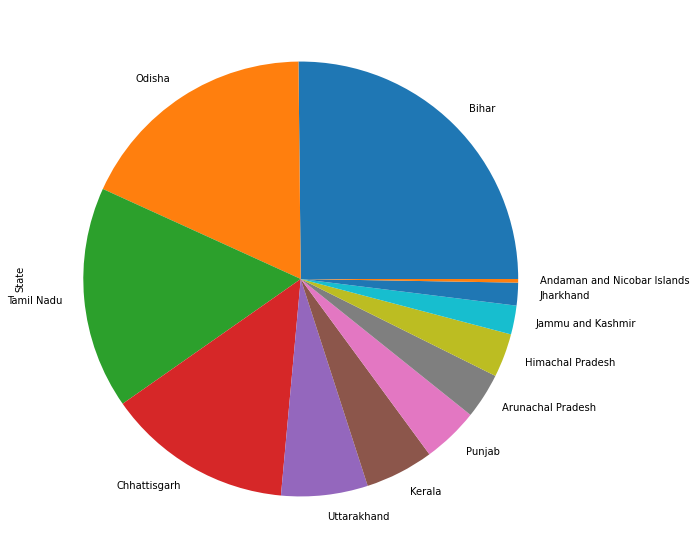

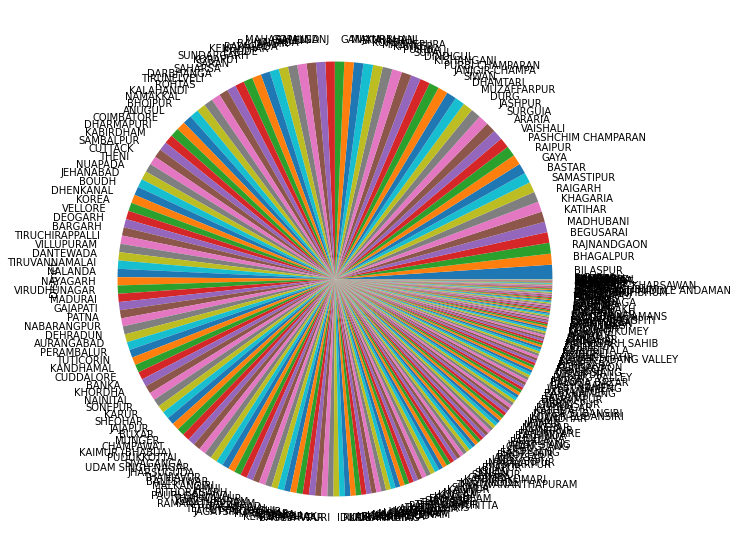

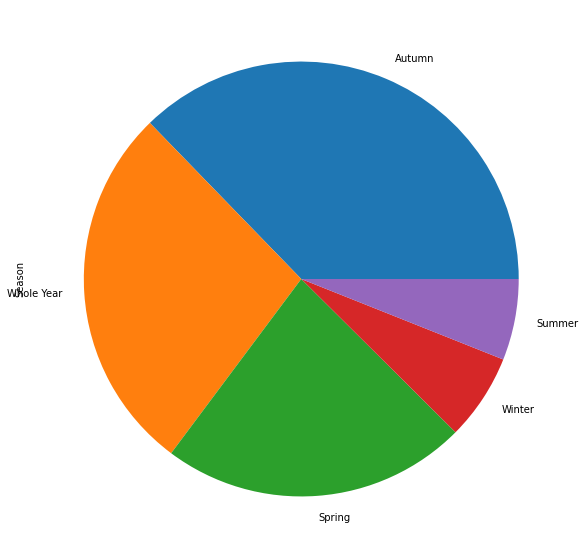

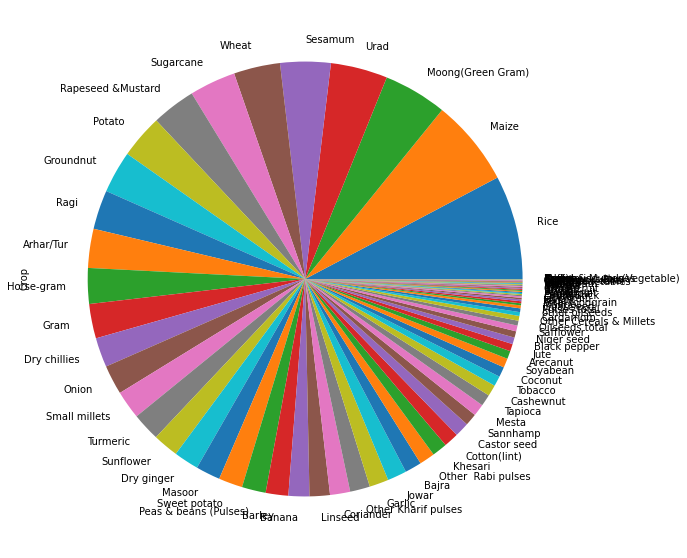

In [12]:
for col in data.select_dtypes('object'):
  plt.figure(figsize=(20,10))
  data[col].value_counts().plot.pie()

Le Crop le plus dominant en Inde est le Riz 

## Variables quantitatives 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

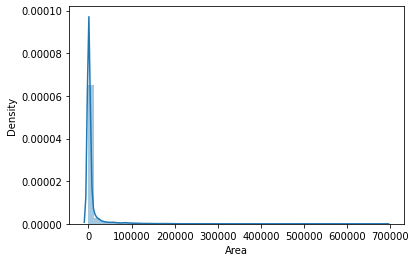

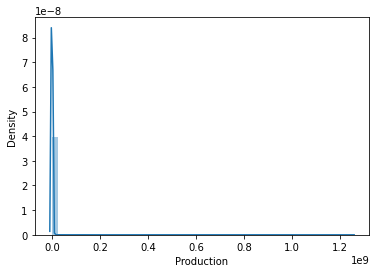

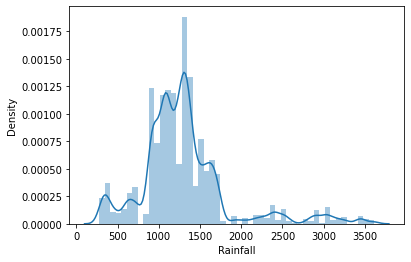

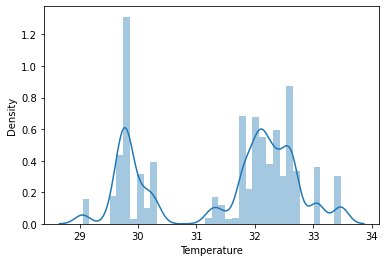

In [13]:
for col in data.select_dtypes('float'):
  plt.figure()
  sns.distplot(data[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab9dc7e650>,
      dtype=object)

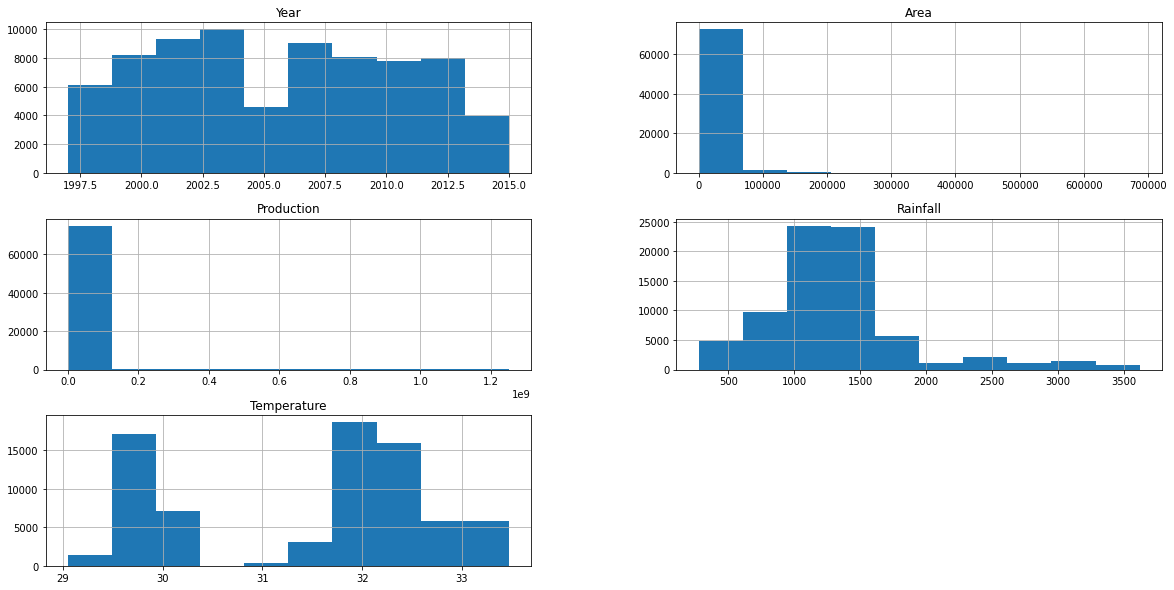

In [14]:
data.hist(figsize=(20,10))

## Cumulative Production per State 

## Cumulative Production per Crop

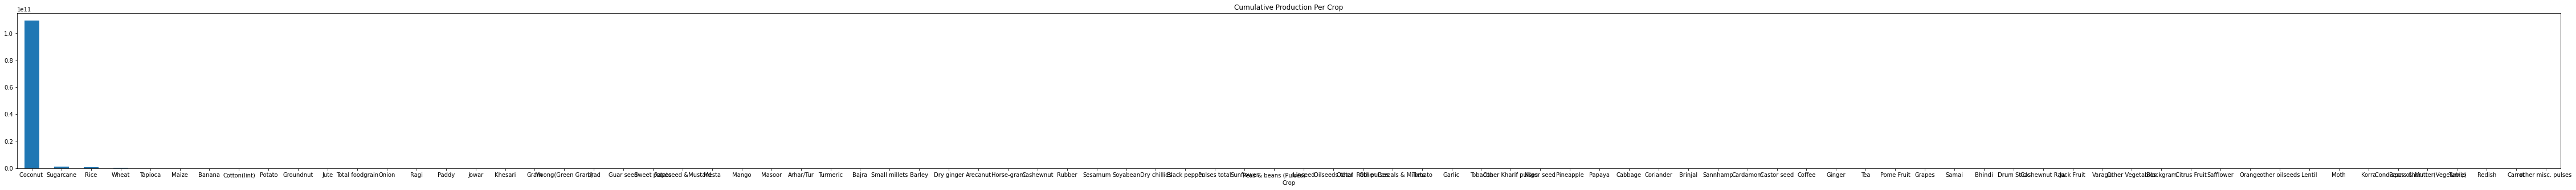

In [15]:
df = data.groupby('Crop')['Production'].sum().sort_values(ascending=False)
plt.figure(figsize=(80,5))
df.plot.bar(x=df.index, y=df.values, title="Cumulative Production Per Crop",rot=0)

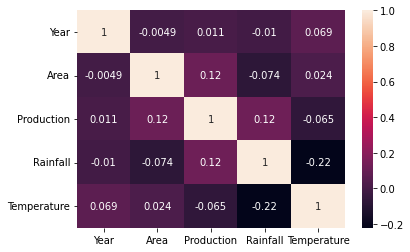

In [16]:
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
# Moderate correlation of Production with Area and Rainfall 

## selectionner les top Crops

In [17]:
crops=['Coconut ', 'Sugarcane', 'Rice', 'Wheat']
data1=data[data.Crop.isin(crops)]


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
anova = smf.ols(formula='Production ~ C(District)', data=data1).fit()
print(anova.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.30
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:04:35   Log-Likelihood:            -2.2366e+05
No. Observations:               11513   AIC:                         4.478e+05
Df Residuals:                   11261   BIC:                         4.497e+05
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [19]:
data1.describe()

,Year,Area,Production,Rainfall,Temperature
count,11513.000000,11513.000000,1.151300e+04,11513.000000,11513.000000
mean,2005.838617,39042.441703,9.694745e+06,1398.185191,31.274361
std,4.995587,65448.954163,7.336034e+07,684.177768,1.237358
min,1997.000000,0.200000,1.000000e-01,274.700000,29.050000
25%,2002.000000,754.000000,2.920000e+03,1032.400000,29.820000
50%,2006.000000,9850.000000,2.626800e+04,1287.200000,31.810000
75%,2010.000000,52615.000000,1.595520e+05,1544.400000,32.320000
max,2015.000000,687000.000000,1.250800e+09,3616.700000,33.470000


In [20]:
for col in data1.select_dtypes('object'):
  print(f'{col :-<15} {data1[col].nunique()}')

State---------- 12
District------- 252
Season--------- 5
Crop----------- 4


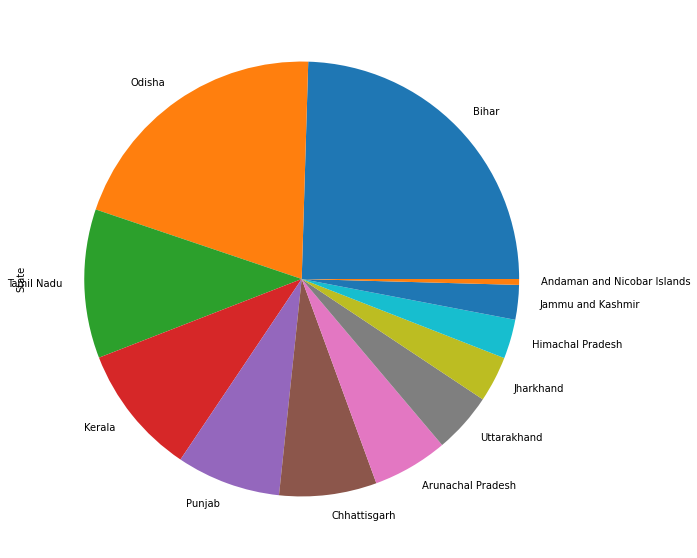

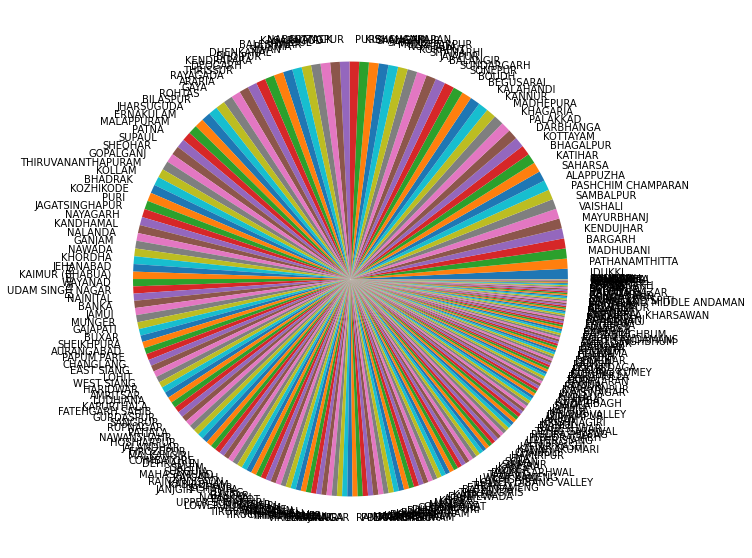

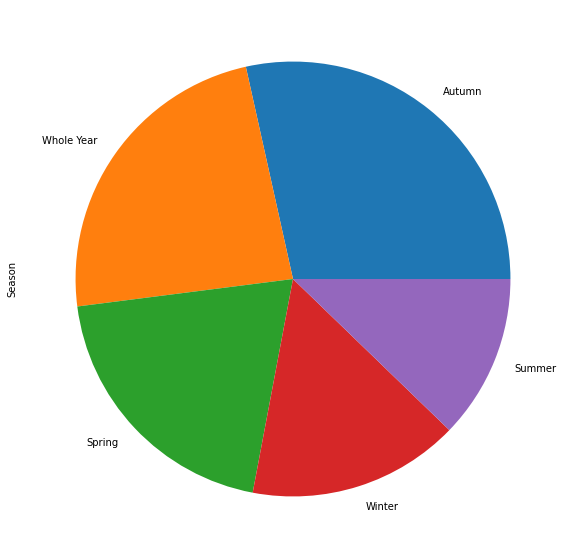

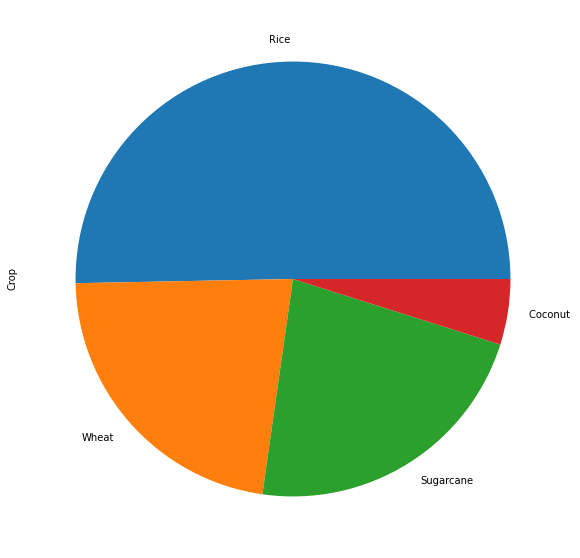

In [21]:
for col in data1.select_dtypes('object'):
  plt.figure(figsize=(20,10))
  data1[col].value_counts().plot.pie()

In [22]:
data1.groupby('State')['Production'].sum().sort_values()

State
Arunachal Pradesh              3.196261e+06
Himachal Pradesh               7.798286e+06
Jammu and Kashmir              7.811707e+06
Jharkhand                      8.178686e+06
Chhattisgarh                   8.567269e+07
Uttarakhand                    1.197303e+08
Odisha                         1.376583e+08
Bihar                          2.792703e+08
Punjab                         5.454280e+08
Andaman and Nicobar Islands    7.180436e+08
Tamil Nadu                     1.188536e+10
Kerala                         9.781745e+10
Name: Production, dtype: float64

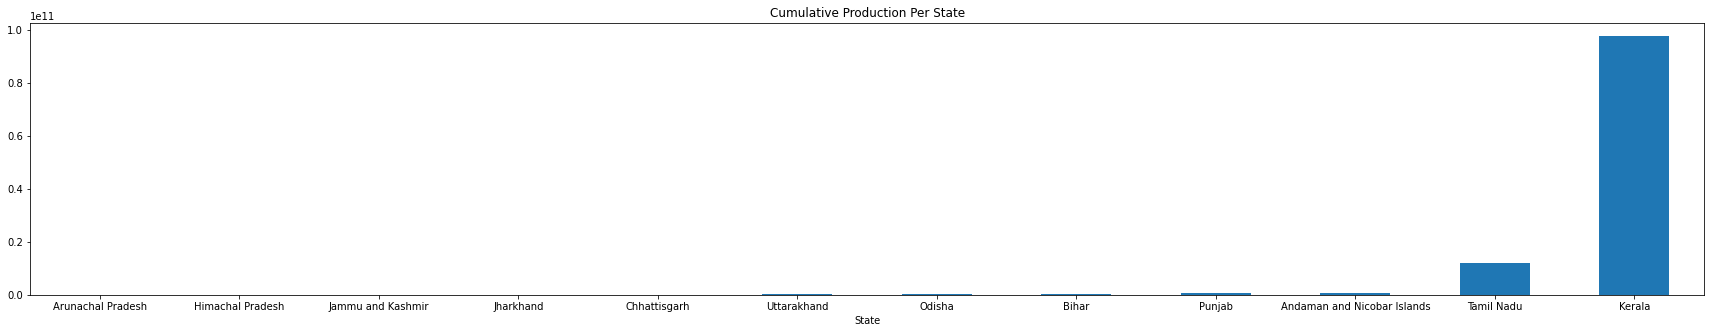

In [23]:
df = data1.groupby('State')['Production'].sum().sort_values()
plt.figure(figsize=(30,5))
df.plot.bar(x=df.index, y=df.values, title="Cumulative Production Per State",rot=0)

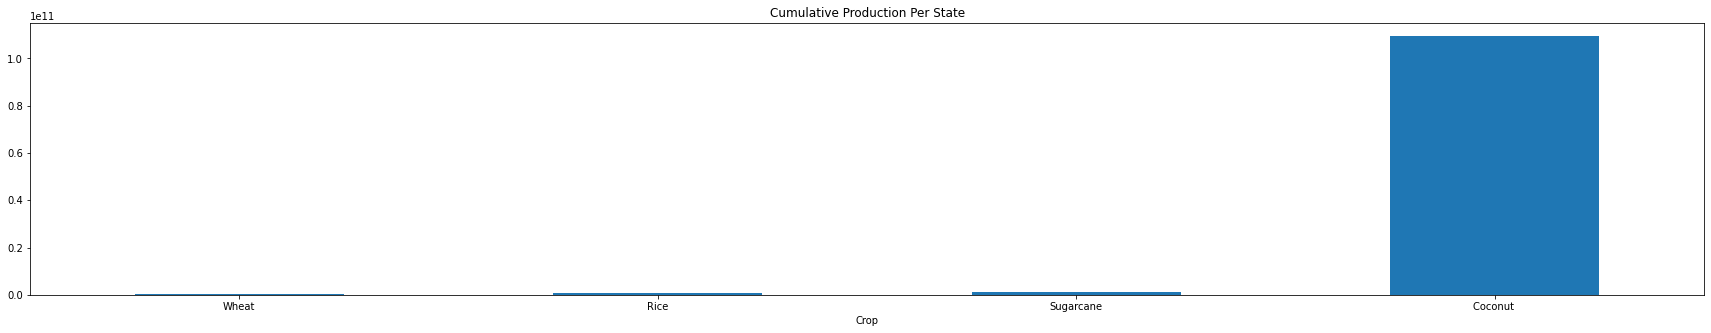

In [24]:
df = data1.groupby('Crop')['Production'].sum().sort_values()
plt.figure(figsize=(30,5))
df.plot.bar(x=df.index, y=df.values, title="Cumulative Production Per State",rot=0)

Year              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Area           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Production     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Rainfall       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Temperature      AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

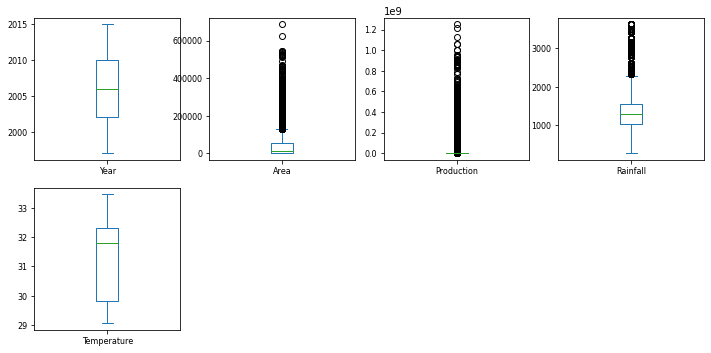

In [25]:
data1.plot(kind='box', subplots=True, layout=(4,4), fontsize=8,figsize=(12,12))

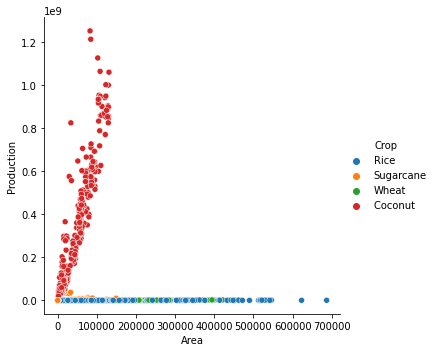

In [26]:
sns.relplot(x='Area', y='Production', hue='Crop', data=data1) 

In [27]:
categorical_features=['State', 'District', 'Crop', 'Season']
data1 = pd.get_dummies(data1,columns =categorical_features)
data1

,Year,Area,Production,Rainfall,Temperature,State_Andaman and Nicobar Islands,State_Arunachal Pradesh,State_Bihar,State_Chhattisgarh,State_Himachal Pradesh,...,District_WEST SINGHBHUM,Crop_Coconut,Crop_Rice,Crop_Sugarcane,Crop_Wheat,Season_Autumn,Season_Spring,Season_Summer,Season_Whole Year,Season_Winter
0,1997,17876.0,21397.0,1303.7,31.77,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1997,38.0,59.0,1303.7,31.77,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1997,7812.0,11698.0,1303.7,31.77,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1997,1215.0,1867.0,1303.7,31.77,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1997,682.0,733.0,1303.7,31.77,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74955,2015,91000.0,98000.0,1210.1,29.90,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
74956,2015,1.0,52.0,1210.1,29.90,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
74964,2015,86000.0,209000.0,1210.1,29.90,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
74968,2015,17.0,1173.9,1210.1,29.90,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
correlated_features = set()
correlation_matrix = data1.corr()
threshold = 0.70

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(len(correlated_features))
print(correlated_features)

3
{'Season_Whole Year', 'Season_Spring', 'State_Kerala'}


In [29]:
# # we start by splitting our dataset to independent and target variable
x = data1.drop(columns=['Production'],axis=1)
y=data1['Production']
x = x.drop(labels=correlated_features, axis=1)
from sklearn.model_selection import train_test_split
import random
random.seed(90)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [31]:
mse = np.mean((y_pred - y_test)**2)
rmse = math.sqrt(mse)
print('rmse=' , rmse)

#Calculate R^2
SSE = sum((y_test - y_pred)**2)
SST = sum((y_test - np.mean(y_test))**2)
R_squared= 1 - SSE/SST
print('R^2 = ', R_squared)

rmse= 121209876633.788
R^2 =  -2615524.820359505


In [32]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_table

,Actual,Predicted
74177,289137.0,-5840916.00
67300,231018.0,17940556.50
73231,1139.0,-6210661.50
43747,385914.0,-41315346.75
38126,30645.0,370367.25
...,...,...
48563,548.0,-3030890.25
62835,129839.8,-6310880.00
2636,18960.0,-18703998.50
49891,38.0,13315899.25


In [33]:
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
rt = dtr.fit(x_train, y_train)
y_rt_train = dtr.predict(x_train)
y_pred = dtr.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error as RMSE
print('Accuracy of CART on train set: {:.2f}'.format(rt.score(x_train, y_train)))
print("Train Root Mean Squared Error:", RMSE(y_train,y_rt_train,squared=False))
print('Accuracy of CART on test set: {:.2f}'.format(rt.score(x_test,y_test)))
print("Test Root Mean Squared Error:", RMSE(y_test,y_pred,squared=False))

Accuracy of CART on train set: 1.00
Train Root Mean Squared Error: 22.278678062564918
Accuracy of CART on test set: 0.93
Test Root Mean Squared Error: 19757829.7245493


In [35]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_table

,Actual,Predicted
74177,289137.0,368655.0
67300,231018.0,266542.0
73231,1139.0,1372.0
43747,385914.0,301506.0
38126,30645.0,25533.0
...,...,...
48563,548.0,574.0
62835,129839.8,99820.0
2636,18960.0,28654.0
49891,38.0,36.0


In [36]:
data2=data[data.Crop.isin(crops)]
data2["Production"].describe()

count    1.151300e+04
mean     9.694745e+06
std      7.336034e+07
min      1.000000e-01
25%      2.920000e+03
50%      2.626800e+04
75%      1.595520e+05
max      1.250800e+09
Name: Production, dtype: float64

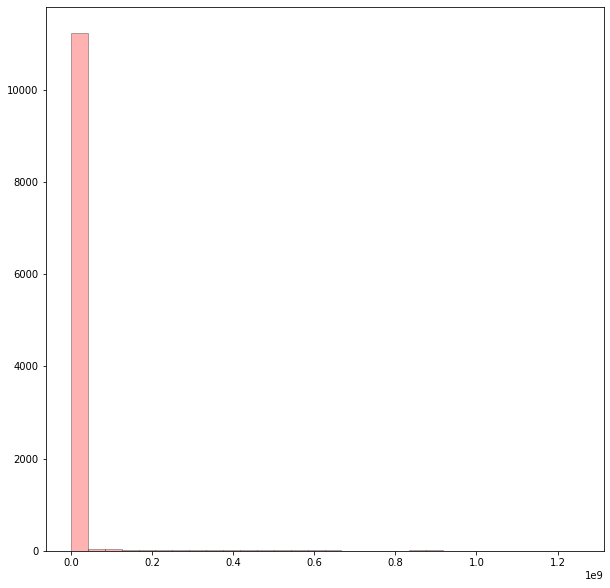

In [37]:
plt.figure(figsize=(10, 10))
plt.hist(data2["Production"], edgecolor='black', bins=30 , alpha=.3, density=False, color='red')
plt.show()

Sur le graphique, on remarque que la fonction densité est désaxée et positive, on exclut par conséquence les lois qui ne répondent pas à ces critères (loi normale par exemple).

In [38]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.stats
import time

In [40]:
dist_names = ['norm', 'beta']
param = []
for distribution in dist_names:
  dist = getattr(stats, distribution)
  parameters = dist.fit(data2["Production"])
  param.append(parameters)
print('paramètres de la loi normale:')
print('arg = ', param[0][:-2])
print('loc = ', param[0][-2])
print('scale =', param[0][-1])
print('\nparamètres de la loi beta:')
print('arg = ', param[1][:-2])
print('loc = ', param[1][-2])
print('scale =', param[1][-1])



/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


paramètres de la loi normale:
arg =  ()
loc =  9694745.0468427
scale = 73357151.0674675

paramètres de la loi beta:
arg =  (0.17124187447651634, 532.7234442538359)
loc =  0.09999999999999999
scale = 5143453733.649311


In [41]:
pdf_list = []
domain = np.linspace( data2["Production"].min(), data2["Production"].max() )
for i, distribution in enumerate(dist_names):
  arg = param[i][:-2]
  loc = param[i][-2]
  scale = param[i][-1]
  dist = getattr(stats , distribution)
  pdf = dist.pdf(domain, *arg, loc=loc, scale=scale)
  pdf_list.append(pdf)




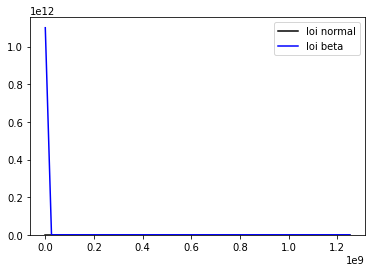

In [42]:
plt.plot(domain, pdf_list[0], color='black', label='loi normal')
plt.plot(domain, pdf_list[1], color='blue', label='loi beta')
plt.hist(data2["Production"] ,edgecolor='black', bins=300 , alpha=.3, density=True, color='red')
plt.legend()
plt.show()

**Evaluer la modélisation**

In [43]:
dist_names = ['beta','norm']
sum_square_error = []
p_value=[]
for distribution in dist_names:
  y, x= np.histogram(data2["Production"], bins=100, density=True)
  x = (x + np.roll(x, -1))[:-1] / 2.0
  ######## méthode fit
  dist = getattr(stats, distribution)
  parameters = dist.fit(data2["Production"])
  ######## paramètres
  loc = parameters[-2]
  scale = parameters[-1]
  arg = parameters[:-2]
  ######## Sum square error
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  sse = np.sum( (y - pdf)**2 )
  sum_square_error.append(sse)
  ######## p_value
  p=stats.kstest(data2["Production"], distribution, parameters)[1]
  p_value.append(p)
results = pd.DataFrame()
results['Distribution'] = dist_names
results['Résidus au carré'] = sum_square_error
results['p_value'] = p_value
results.sort_values(['Résidus au carré'], inplace=True, ascending=True)
###### rapport
print ('Classement des distributions:')
results

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Classement des distributions:


,Distribution,Résidus au carré,p_value
0,beta,4.019325e-15,0.0
1,norm,5.370638e-15,0.0


# **Partie Fitting**

In [44]:
!pip install fitter


**----------------------------------------------------------------------------------------------**

In [81]:
# plt.figure(figsize=(10, 10))

# from fitter import Fitter
# f = Fitter(data2["Production"])
# f.fit()
# f.summary()



,sumsquare_error,aic,bic,kl_div
beta,4.019325e-15,18331.739985,-489252.366895,inf
chi,4.259033e-15,8147.247214,-488594.791217,inf
chi2,4.402778e-15,4863.573287,-488212.633930,inf
gamma,4.809981e-15,4813.691587,-487194.224209,inf
norm,5.370638e-15,13277.143521,-485934.226979,inf


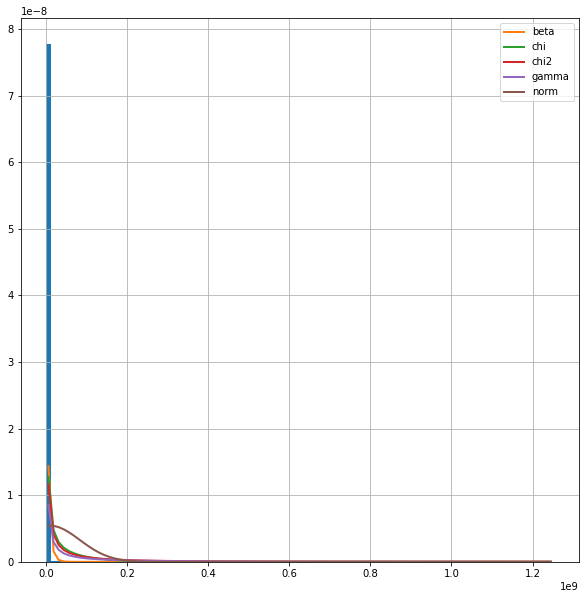

In [82]:
plt.figure(figsize=(10, 10))

f = Fitter(data2["Production"],distributions=['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2'])
f.fit()
f.summary()

In [50]:
data2["Crop"].unique()

array(['Rice', 'Sugarcane', 'Wheat', 'Coconut '], dtype=object)

In [78]:
# crops=['Coconut']
# data3=data2[data.Crop.isin(crops)]
# data3
crop1=['Coconut ']
crop2=['Sugarcane']
crop3=['Rice']
crop4=['Wheat']

data2["Crop"].unique()
data3=data2[data2.Crop.isin(crop1)]
data4=data2[data2.Crop.isin(crop2)]
data5=data2[data2.Crop.isin(crop3)]
data6=data2[data2.Crop.isin(crop4)]

,sumsquare_error,aic,bic,kl_div
gamma,4.311337e-16,4721.947020,-23380.227883,inf
invgauss,5.610735e-16,4920.620405,-23232.441583,inf
lognorm,5.699843e-16,4597.052006,-23223.601974,inf
chi,5.926689e-16,4466.070607,-23201.707777,inf
alpha,6.619009e-16,5467.690434,-23139.728527,inf


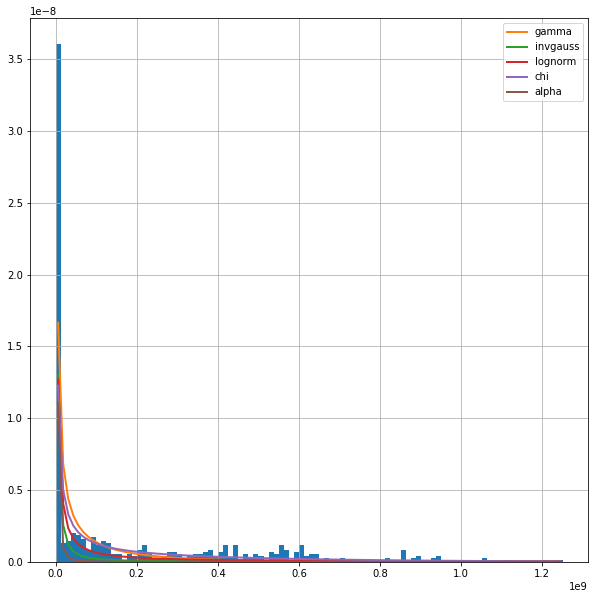

In [64]:
plt.figure(figsize=(10, 10))

f = Fitter(data3["Production"],distributions=['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2'])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
chi,2.704365e-12,34678.891453,-393558.845965,inf
chi2,3.163371e-12,4724.521022,-391841.887413,inf
beta,3.326724e-12,60875.354999,-391281.153338,inf
lognorm,3.559013e-12,4233.551432,-390551.248617,inf
norm,3.925067e-12,61806.942192,-389488.346085,inf


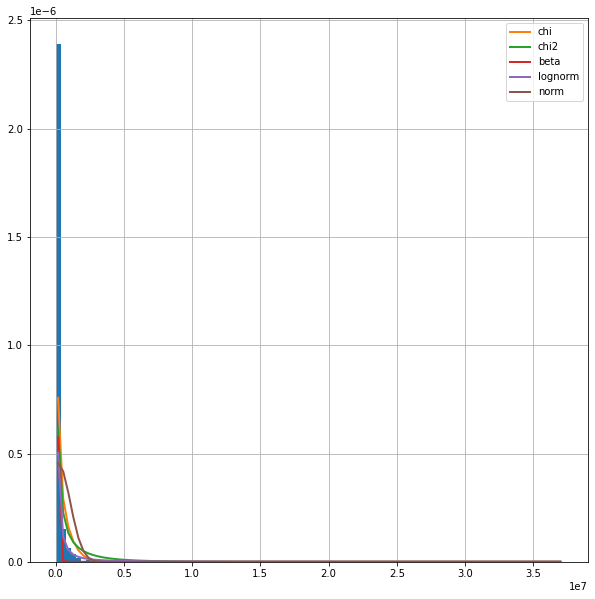

In [76]:
plt.figure(figsize=(10, 10))

f = Fitter(data4["Production"],distributions=['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2'])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
invgamma,4.282537e-12,3300.505365,-201771.391345,inf
invgauss,5.003453e-12,3329.988562,-200870.255398,inf
lognorm,2.921515e-11,3265.434897,-190649.929583,inf
t,3.470511e-11,3455.344580,-189652.549825,inf
beta,6.400124e-11,4262.308559,-186099.091606,inf


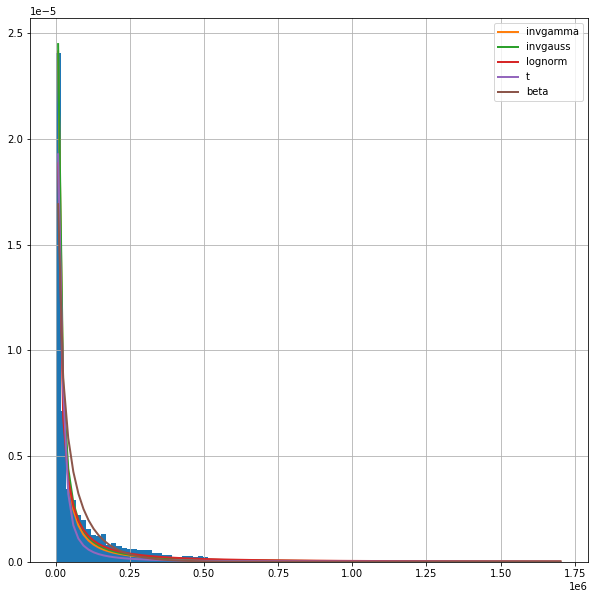

In [79]:
plt.figure(figsize=(10, 10))

f = Fitter(data5["Production"],distributions=['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2'])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
alpha,1.341679e-11,3566.630835,-84968.343095,inf
beta,8.652535e-11,4988.277120,-80144.090427,inf
invgauss,1.145422e-10,3493.566860,-79427.120829,inf
lognorm,2.032242e-10,3315.911967,-77945.541801,inf
chi,2.575413e-10,3579.676050,-77333.468153,inf


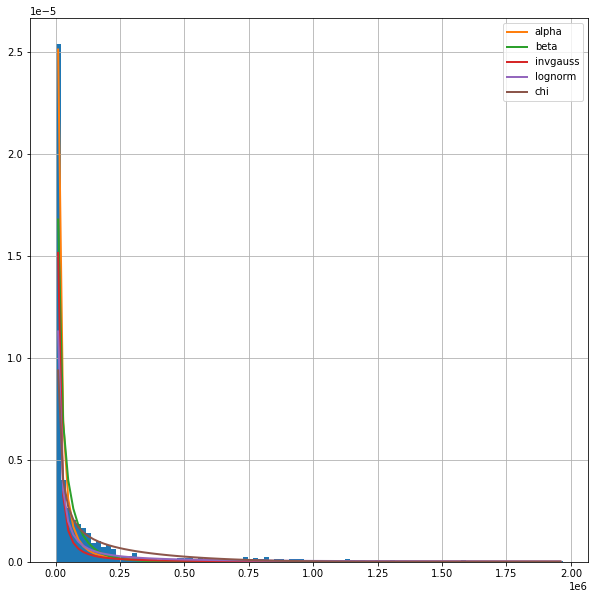

In [80]:
plt.figure(figsize=(10, 10))

f = Fitter(data6["Production"],distributions=['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2'])
f.fit()
f.summary()